## Text Preprocessing

In [1]:
import pandas as pd
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
df = pd.read_csv("Kaggle dataset.csv")


Remove null reviews:

In [3]:
df = df.dropna(subset=['cleaned_review'])


Prepare Stopwords (Keep Negations) ✅

In [4]:
stop_words = set(stopwords.words('english'))

# Negation words must be kept
negations = {'not', 'no', 'nor', 'never'}
stop_words = stop_words - negations


Text Cleaning Function

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)       # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)    # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()

    words = text.split()
    words = [w for w in words if w not in stop_words]

    return " ".join(words)


In [6]:
df['processed_review'] = df['cleaned_review'].apply(clean_text)
df[['cleaned_review', 'processed_review']].head()


,cleaned_review,processed_review
0,i wish would have gotten one earlier love it a...,wish would gotten one earlier love makes worki...
1,i ve learned this lesson again open the packag...,learned lesson open package use product right ...
2,it is so slow and lags find better option,slow lags find better option
3,roller ball stopped working within months of m...,roller ball stopped working within months mini...
4,i like the color and size but it few days out ...,like color size days return period not hold ch...


## Text Vectorization using TF-IDF

##### Why TF-IDF for Sentiment Analysis?

✔ Works best with text data

✔ Reduces impact of common words

✔ Improves model accuracy

✔ Ideal for Logistic Regression

In [7]:
X = df['processed_review']
y = df['sentiments']


##### Train–Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


stratify=y (VERY IMPORTANT)

Ensures same class distribution in both train and test sets

Example:

If dataset has 70% positive, 30% negative

Then both X_train & X_test will keep this ratio

✔️ This is especially important in sentiment analysis

**Note:** stratify=y keeps sentiment distribution balanced.

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=300,
    ngram_range=(1, 2)
)


**max_features=5000:**
Keeps only the top 5000 most important words/phrases

**What (1, 2) means:**

Use unigrams (single words)

Use bigrams (two-word combinations)


Unigram only:

"good"


✅ Bigram:

"not good"


📌 Bigram captures negation and sentiment shift


Fit on training data and transform:


In [103]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


| Step                | Meaning                             |
| ------------------- | ----------------------------------- |
| `fit`               | Learn vocabulary from training data |
| `transform`         | Convert text → numeric vectors      |
| `ngram_range=(1,2)` | Uses unigrams + bigrams             |
| `max_features=5000` | Limits feature size                 |


In [104]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print("✔ Rows = reviews \n✔ Columns = TF-IDF features")

(13869, 300)
(3468, 300)
✔ Rows = reviews 
✔ Columns = TF-IDF features


## Model Training using Logistic Regression

##### Why Logistic Regression for Sentiment Analysis?

✔ Best for text classification
✔ Works very well with TF-IDF features
✔ Fast and interpretable
✔ Standard algorithm for NLP tasks

**📌 Despite the name, it is used for classification, not regression.**

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(
    LogisticRegression()
)


In [106]:
model.fit(X_train_tfidf, y_train)


,"estimator estimator: estimator objectA regressor or a classifier that implements :term:`fit`.When a classifier is passed, :term:`decision_function` will be usedin priority and it will fallback to :term:`predict_proba` if it is notavailable.When a regressor is passed, :term:`predict` is used.",LogisticRegression()
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation: the `n_classes`one-vs-rest problems are computed in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: 0.20 `n_jobs` default changed from 1 to None",None
,"verbose verbose: int, default=0The verbosity level, if non zero, progress messages are printed.Below 50, the output is sent to stderr. Otherwise, the output is sentto stdout. The frequency of the messages increases with the verbositylevel, reporting all iterations at 10. See :class:`joblib.Parallel` formore details... versionadded:: 1.1",0
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeight

In [107]:
y_pred = model.predict(X_test_tfidf)
y_pred


array(['neutral', 'positive', 'neutral', ..., 'positive', 'positive',
       'neutral'], shape=(3468,), dtype='<U8')

## Model Evaluation (Accuracy, Confusion Matrix, Precision, Recall)

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [109]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 80.91%


Confusion Matrix:
 [[  57  203   47]
 [  22 1044  194]
 [   6  190 1705]]


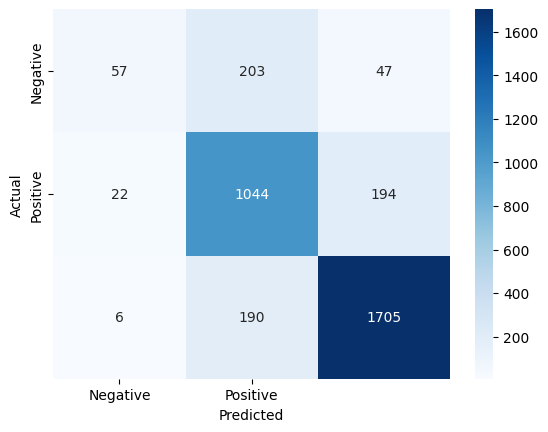

In [110]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Visualize it as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [111]:

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy from Confusion Matrix: {accuracy * 100:.2f}%")



Accuracy from Confusion Matrix: 83.03%


# Function of NLP


In [114]:
# the review text column name must be cleaned_review

def nlp(df):
    import pandas as pd
    import re
    import nltk

    nltk.download('stopwords')
    from nltk.corpus import stopwords
    df = df.dropna(subset=['cleaned_review'])
    stop_words = set(stopwords.words('english'))

    # Negation words must be kept
    negations = {'not', 'no', 'nor', 'never'}
    stop_words = stop_words - negations


    def clean_text(text):
        text = text.lower()
        text = re.sub(r'<.*?>', '', text)       # remove HTML tags
        text = re.sub(r'[^a-z\s]', '', text)    # remove punctuation & numbers
        text = re.sub(r'\s+', ' ', text).strip()

        words = text.split()
        words = [w for w in words if w not in stop_words]

        return " ".join(words)


    df['processed_review'] = df['cleaned_review'].apply(clean_text)
    df[['cleaned_review', 'processed_review']].head()

    x = df['processed_review']



    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf = TfidfVectorizer(
        max_features=300,
        ngram_range=(1, 2)
    )

    X_train_tfidf = tfidf.fit_transform(x)

    print(X_train_tfidf.shape)
    print("✔ Rows = reviews \n✔ Columns = TF-IDF features")

    return(X_train_tfidf)



## Predict for other dataset 

In [118]:
n_df=pd.read_csv('raw_reviews.csv')

n_x_train= nlp(n_df)

predict = model.predict(n_x_train)
predict
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")


(70, 300)
✔ Rows = reviews 
✔ Columns = TF-IDF features


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priti.mujbaile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['positive', 'negative', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'positive'],
      dtype='<U8')

# Function to convert string to vector

In [119]:
def vectorize_text(text, tfidf):
    """
    Converts input text into TF-IDF vector using a trained TF-IDF vectorizer.

    Parameters:
    text  : str or list of str
    tfidf : trained TfidfVectorizer

    Returns:
    TF-IDF vector
    """

    # If single string is passed, convert to list
    if isinstance(text, str):
        text = [text]

    # Transform using trained TF-IDF
    vector = tfidf.transform(text)

    return vector


In [ ]:
review = input("Enter your review here: ")
review_vector = vectorize_text(review, tfidf)

print(review_vector.shape)


(1, 300)


In [129]:
model.predict(review_vector)

array(['positive'], dtype='<U8')